Solve a **Markowitz Portfolio** problem with **JuMP**:
$$
\begin{alignat}{2}
\min_{x \geq 0} \quad & x^T \Sigma x \\
\text{subject to} \quad & \mu x \geq r_{min} \\
& \sum x = 1
\end{alignat}
$$

In [24]:
using JuMP, Mosek, DataFrames, PyPlot

In [25]:
data = readtable("seudo_stock_data.csv")
data=data[2:end]

,stock1,stock2,stock3
1,0.42,5.87,7.59
2,1.75,8.79,16.13
3,0.3,5.33,5.8
4,0.24,5.84,9.14
5,1.65,9.03,13.25
6,0.0,3.88,3.23
7,0.66,7.08,9.0
8,0.3,5.33,5.8
9,0.24,5.84,9.14
10,0.28,5.51,6.96


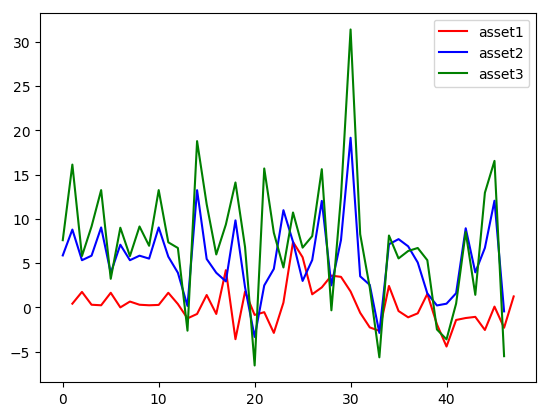

PyObject <matplotlib.legend.Legend object at 0x14b524fd0>

In [26]:
data = convert(Array{Float64}, data)
plot([i for i in 1:length(data[:,1])],data[:,1],color="r", label="asset1")
plot(data[:,2],color="b",label="asset2")
plot(data[:,3],color="g",label="asset3")
legend()

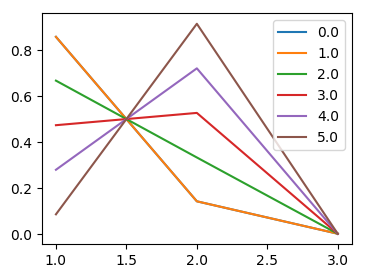

PyObject <matplotlib.legend.Legend object at 0x14d021fd0>

In [40]:
n, μ, Σ = length(data[1,:]), vec(mean(data,1)), cov(data)
result=[]
figure(figsize=(4.0,3.0))  
for r_min in 0.0:1.0:5.0
    port = Model(solver=MosekSolver(LOG=0))
    @variable(port, 0 ≤ x[1:n] ≤ 1)
    @constraint(port, sum(x) == 1)
    @constraint(port, dot(μ,x) ≥ r_min)
    @objective(port, Min, x' * Σ * x)
    solve(port)
    plot([i for i in 1:n], getvalue(x), label=r_min)
end
legend()